In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers,datasets,callbacks
from keras.utils import to_categorical
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
earlystop_callback = callbacks.EarlyStopping(
  monitor='val_accuracy', mode = 'max', min_delta=0.001,
  patience=3, restore_best_weights=True)

In [175]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

In [176]:
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [177]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
flatten_21 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)             

In [178]:
# LR = .0001, minimum loss = .0216 , min val_loss = .0465 , max accuracy = .9943 , max val_accuracy = .9889 , Adam
# LR = .001, minimum loss = .0353 , min val_loss = .5271 , max accuracy = .9889 , max val_accuracy = .8695 , Adam
# LR = .01, minimum loss = .0732 , min val_loss = 1.2675 , max accuracy = .9821 , max val_accuracy = .6603 , Adam
# LR = .1, minimum loss = 2.3504 , min val_loss = 2.3250 , max accuracy = .1044 , max val_accuracy = .1135 , Adam

# LR = .0001, minimum loss = 2.3008 , min val_loss = 2.3010 , max accuracy = .1147 , max val_accuracy = .1135 , SGD
# LR = .001, minimum loss = 2.3011 , min val_loss = 2.3010 , max accuracy = .1143 , max val_accuracy = .1135 , SGD
# LR = .01, minimum loss = 2.3012 , min val_loss = 2.3011 , max accuracy = .1138 , max val_accuracy = .1135 , SGD
# LR = .1, minimum loss = 2.3041 , min val_loss = 2.3015 , max accuracy = .1093 , max val_accuracy = .1135 , SGD

In [179]:
# Adam, LR = .0001, minimum loss = .0569 , min val_loss = .1134 , max accuracy = .9828 , max val_accuracy = .9548 , Sigmoid
# Adam, LR = .0001, minimum loss = .0243 , min val_loss = .0235 , max accuracy = .9973 , max val_accuracy = .9928 , Relu

In [180]:
# Adam, LR = .001, minimum loss = .0180 , min val_loss = .0187 , max accuracy = .9943 , max val_accuracy = .9940, WithAugment
# Adam, LR = .001, minimum loss = .0045 , min val_loss = .0205 , max accuracy = .9990 , max val_accuracy = .9931, WithoutAugment

In [181]:
# Depth, Adam, relu, LR = .0001, minimum loss = .0344 , min val_loss = .0329 , max accuracy = .9897 , max val_accuracy = .9897  
# Bredth, Adam, relu, LR = .0001, minimum loss = .0387 , min val_loss = .0323 , max accuracy = .9886 , max val_accuracy = .9901
# Mixed, Adam, relu, LR = .0001, minimum loss = .0209 , min val_loss = .0192 , max accuracy = .9938 , max val_accuracy = .9941

In [14]:
opt = keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=opt,
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])
datagen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False)

dataflow = datagen.flow(train_images, train_labels, batch_size=64)
steps = int(train_images.shape[0]/64)

history = model.fit(dataflow, steps_per_epoch=steps, epochs=100, 
                    validation_data=(test_images, test_labels),
                    callbacks = [earlystop_callback])

Epoch 1/100
 58/781 [=>............................] - ETA: 1:19 - loss: 0.9077 - accuracy: 0.6778

KeyboardInterrupt: 

313/313 - 2s - loss: 0.0303 - accuracy: 0.9907


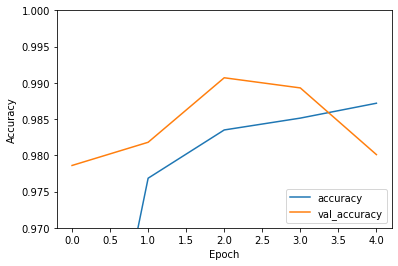

In [185]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([.97,1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 2s - loss: 0.0303 - accuracy: 0.9907


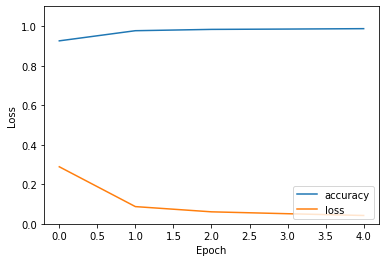

In [186]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)